#### Dataset:
Sales prediction is a very common real-life problem that each company faces atleast once in its lifetime. If done correctly, it can have a significant impact on the success and performance of that company. According to a study, companies with accurate sales predictions are 10% more likely to grow their revenue year-over-year and 7.3% more likely to hit quota.

The notebook is divided into below modules:
#### 1.Exploratory Data Analysis
#### 2.Data Preparation

In [1]:
import os
print(os.getcwd())
os.chdir('C:/Users/adhar/Documents/Courses/DataScience_Python/Sessions/EDA')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

C:\Users\adhar\Documents\Courses\DataScience_Python\Sessions\EDA


#### Why do we need Exploratory Data Analysis (EDA)?
After understanding the dimensions and properties of data, we have to deep dive and explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

Let’s start with univariate EDA. It involves exploring variables individually. We will try to visualize the continuous variables using histograms and categorical variables using bar plots.

## Exploratory Data Analysis
There are no shortcuts for data exploration. If you are in a state of mind, that machine learning can sail you away from every data storm, it won’t. After some point of time, you’ll realize that you are struggling at improving model’s accuracy. In such situation, data exploration techniques will come to your rescue.
#### 1. Steps of Data Exploration and Preparation
Remember the quality of your inputs decide the quality of your output. So, once you have got your business hypothesis ready, it makes sense to spend lot of time and efforts here. Data exploration, cleaning and preparation can take up to 70-80% of your total project time.<br/>
Below are the steps involved to understand, clean and prepare your data for building your predictive model:<br/>

1.Variable Identification<br/>
2.Univariate Analysis (Both descriptive and graphical)<br/>
3.Bi-variate Analysis (Both descriptive and graphical)<br/>
4.Missing values treatment<br/>
5.Outlier treatment<br/>
6.Variable transformation<br/>
7.Variable creation (Feature Engineering)<br/>
<br/> Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.<br/>
Let’s now study each stage in  detail:-

###### 1.Variable Identification
First, identify Predictor (Input/Independent variable) and Target (output/dependent variable) variables. Next, identify the data type and category of the variables and the meaning of each variables(data dictionary)
Q. What is our target variable?
Q. What are our predictor variables?

In [2]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


##### 2.Uni-Variate Analysis
At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

###### Continuous Variables:- 
In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods

###### Note: 
Univariate analysis is also used to highlight missing and outlier values. We will discuss in further later

###### Categorical Variables:-
For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

Let's jump to analyse the variables!!

##### Dependent Variable (Continuous)

In [5]:
#First lets look at the summary statistic of the target variable
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

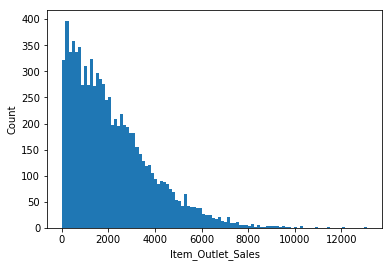

In [6]:
#Rather than looking only at the numbers, we can visualize the data to understand it more
plt.hist(train.Item_Outlet_Sales,bins=100)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Count")
plt.show()

As we can see, it is a right skewd variable and would need some data transformation to treat its skewness.

##### Independent Variables (numeric variables)
Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of the variables.

In [7]:
train[["Item_Weight","Item_Visibility","Item_MRP"]].describe()


,Item_Weight,Item_Visibility,Item_MRP
count,7060.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782
std,4.643456,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,8.773750,0.026989,93.826500
50%,12.600000,0.053931,143.012800
75%,16.850000,0.094585,185.643700
max,21.350000,0.328391,266.888400


We can see from above that Item_Weight has a lot of missing values. While visualizing this variable we need to take note of this point

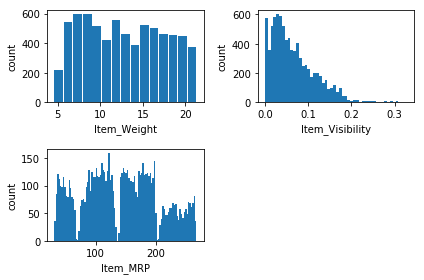

In [8]:
#plt.subplot(nrows-ncols-index)
#Lets use subplot to get multiple plot outputs at the same time
plt.subplot(221)
plt.hist(train.Item_Weight.dropna(),rwidth=0.9,bins=15) #rwidth sets width of bars.If it's 1 then the bars will touch each other
plt.xlabel("Item_Weight")
plt.ylabel("count")
plt.subplot(222)
plt.hist(train.Item_Visibility,bins=50) #rwidth sets width of bars.If it's 1 then the bars will touch each other
plt.xlabel("Item_Visibility")
plt.ylabel("count")
plt.subplot(223)
plt.hist(train.Item_MRP,bins=100)
plt.xlabel("Item_MRP")
plt.ylabel("count")
plt.tight_layout()          # this function makes sure the plots dont overlap.Comment this and execute to observe the difference
plt.show()


__Observations__

- There seems to be no clear-cut pattern in Item_Weight.<br/>
- Item_Visibility is right-skewed and should be transformed to curb its skewness.<br/>
- We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

__Independent Variables (categorical variables)__ <br/>
Now we’ll try to explore and gain some insights from the categorical variables.<br/>
A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

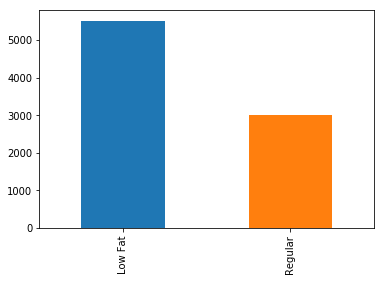

In [28]:
train["Item_Fat_Content"].value_counts().plot(kind='bar')

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one.<br/> Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again

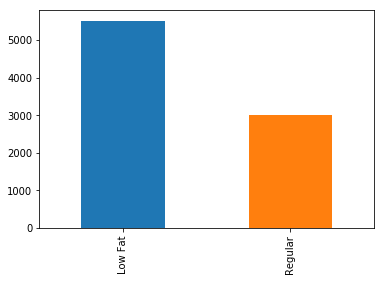

In [27]:
train.loc[train.Item_Fat_Content=="LF","Item_Fat_Content"]      = "Low Fat"
train.loc[train.Item_Fat_Content=="low fat","Item_Fat_Content"] = "Low Fat"
train.loc[train.Item_Fat_Content=="reg","Item_Fat_Content"]     = "Regular"
train["Item_Fat_Content"].value_counts().plot(kind='bar')

Now let’s check the other categorical variables.

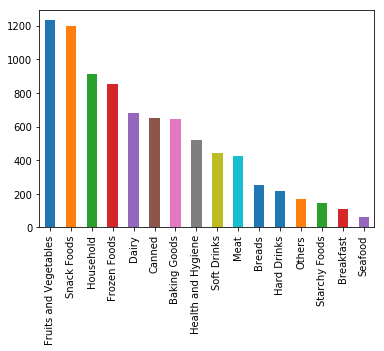

In [29]:
#Item_Type
train["Item_Type"].value_counts().plot(kind='bar')

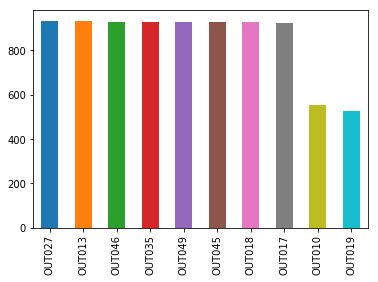

In [30]:
#Outlet Identifier
train["Outlet_Identifier"].value_counts().plot(kind='bar')

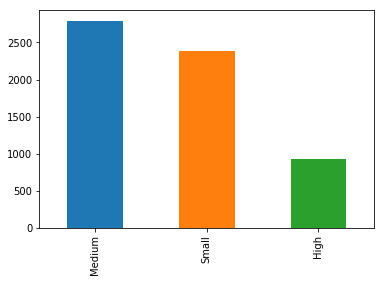

In [31]:
#Outlet Size
train["Outlet_Size"].value_counts().plot(kind='bar')

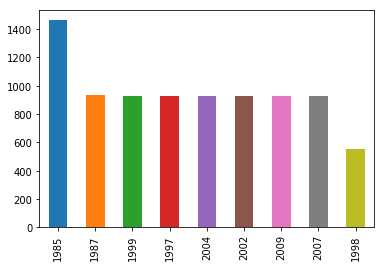

In [32]:
#Outlet_Establishment_Year
train["Outlet_Establishment_Year"].value_counts().plot(kind='bar')

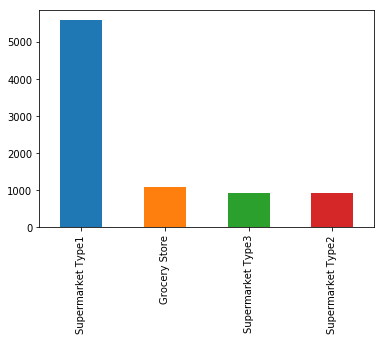

In [34]:
#Outlet_Type
train["Outlet_Type"].value_counts().plot(kind='bar')

__Observations__

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.<br/>
Supermarket Type 1 seems to be the most popular category of Outlet_Type.

#### 3.Bivariate Analysis
Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

Let’s understand the possible combinations in detail:

__Continuous & Continuous__: While doing bi-variate analysis between two continuous variables, we should look at scatter plot. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.
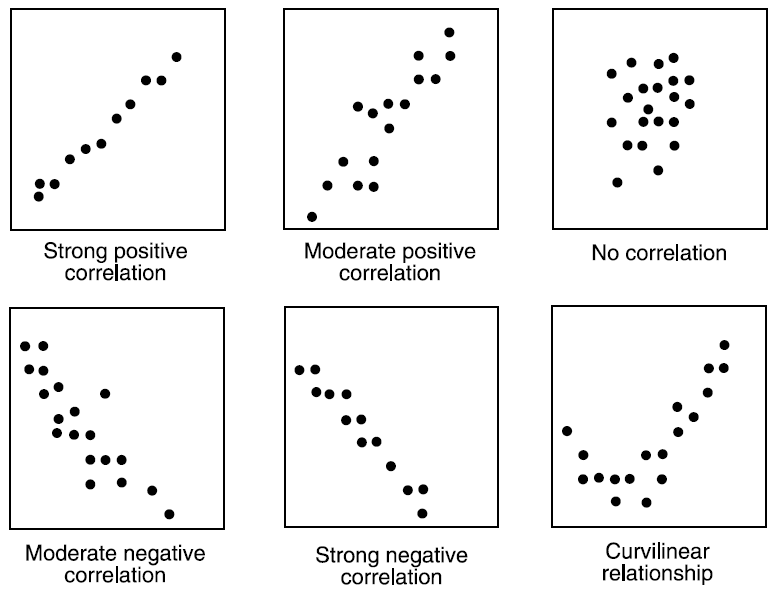


Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

- -1: perfect negative linear correlation
- +1:perfect positive linear correlation and 
- 0: No correlation
Correlation can be derived using following formula:

Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))

Various tools have function or functionality to identify correlation between variables. 

__Categorical & Categorical__: To find the relationship between two categorical variables, we can use following methods:

- Two-way table: We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.
- Stacked Column Chart: This method is more of a visual form of Two-way table.
<img src="img/img2.png">

- Chi-Square Test: This test is used to derive the statistical significance of relationship between the variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well. Chi-square is based on the difference between the expected and observed frequencies in one or more categories in the two-way table. It returns probability for the computed chi-square distribution with the degree of freedom.


__Categorical & Continuous__: While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA.

- Z-Test/ T-Test:- Either test assess whether mean of two groups are statistically different from each other or not.If the probability of Z is small then the difference of two averages is more significant. The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30.

- ANOVA:- It assesses whether the average of more than two groups is statistically different.


After looking at every feature individually, let’s now do some bivariate analysis. Here we’ll explore the independent variables with respect to the target variable. The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

### Target Variable vs Independent Numerical Variables###
Let’s explore the numerical variables first.

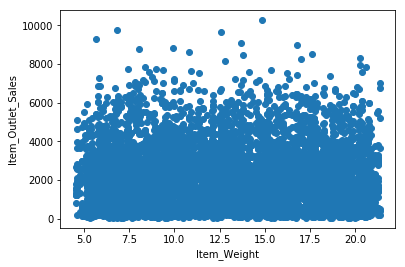

In [38]:
plt.scatter(x=train.Item_Weight,y=train.Item_Outlet_Sales)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.show()

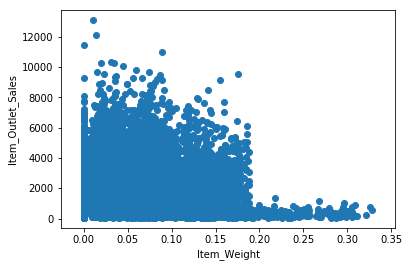

In [39]:
plt.scatter(x=train.Item_Visibility,y=train.Item_Outlet_Sales)
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.show()

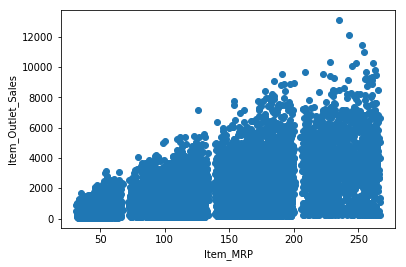

In [40]:
plt.scatter(x=train.Item_MRP,y=train.Item_Outlet_Sales)
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()

__Observations__

- Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
- In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
- In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

### Target Variable vs Independent Categorical Variables ###
Now we’ll visualise the categorical variables with respect to Item_Outlet_Sales. We will try to check the distribution of the target variable across all the categories of each of the categorical variable. We will use boxplot to visualize it.

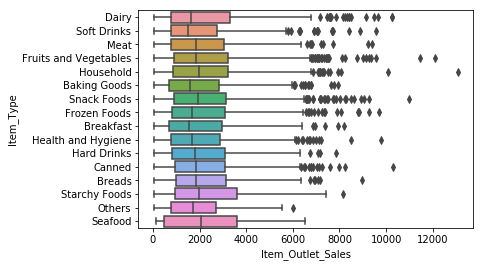

In [52]:
#For better visualization I have drawn the boxplot horizontally(passing x as sales)
sns.boxplot(x=train.Item_Outlet_Sales,y=train.Item_Type)
plt.show()

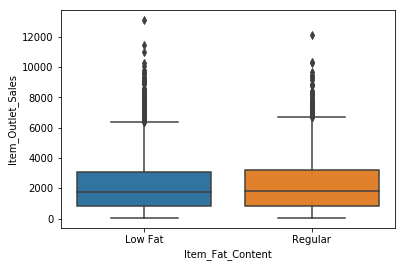

In [53]:
sns.boxplot(x=train.Item_Fat_Content,y=train.Item_Outlet_Sales)
plt.show()

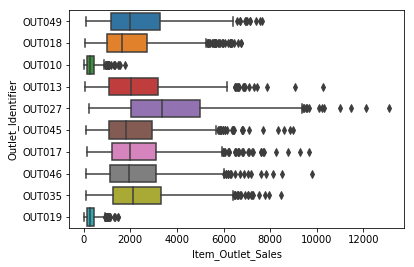

In [55]:
sns.boxplot(y=train.Outlet_Identifier,x=train.Item_Outlet_Sales)
plt.show()

__Observations__

- Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.
- The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

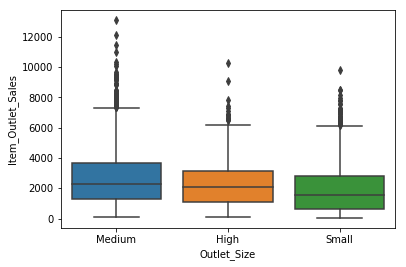

In [56]:
sns.boxplot(x=train.Outlet_Size,y=train.Item_Outlet_Sales)
plt.show()

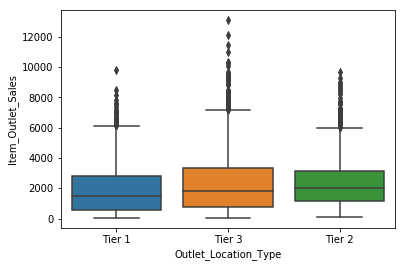

In [58]:
sns.boxplot(x=train.Outlet_Location_Type,y=train.Item_Outlet_Sales)
plt.show()

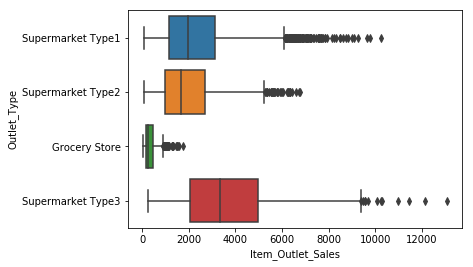

In [60]:
sns.boxplot(y=train.Outlet_Type,x=train.Item_Outlet_Sales)
plt.show()

__Observations__

- Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.
- In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.


These are the kind of insights that we can extract by visualizing our data. Hence, data visualization should be an important part of any kind data analysis.

#### 4. Missing Value Treatment ####
 

__Why missing values treatment is required?__ <br/>
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.
<img src="img/img3.png">

Notice the missing values in the image shown above: In the left scenario, we have not treated missing values. The inference from this data set is that the chances of playing cricket by males is higher than females. On the other hand, if you look at the second table, which shows data after treatment of missing values (based on gender), we can see that females have higher chances of playing cricket compared to males.

__Why my data has missing values?__
We looked at the importance of treatment of missing values in a dataset. Now, let’s identify the reasons for occurrence of these missing values. They may occur at two stages:

__1.Data Extraction__: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well. <br/>
__2.Data collection__: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:
- Missing completely at random: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
- Missing at random: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.
- Missing that depends on unobserved predictors: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
- Missing that depends on the missing value itself: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.

__Which are the methods to treat missing values ?__
- __Deletion__:  It is of two types: List Wise Deletion and Pair Wise Deletion.
  - In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.
  - In pair wise deletion, we perform analysis with all cases in which the variables of interest are present. Advantage of this method is, it keeps as many cases available for analysis. One of the disadvantage of this method, it uses different sample size for different variables.
  - Deletion methods are used when the nature of missing data is “Missing completely at random” else non random missing values can bias the model output. Also it's advised not to use deletion method when more than 5% of data is missing.
<img src="img/img4.png">

- __Mean/ Mode/ Median Imputation__: Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:-
    - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median. Like in above table, variable “Manpower” is missing so we take average of all non missing values of “Manpower”  (28.33) and then replace missing value with it.
    - Similar case Imputation: In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender. For “Male“, we will replace missing values of manpower with 29.75 and for “Female” with 25.
    
- __Prediction Model__:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.We can use regression, Logistic regression and various modeling technique to perform this. There are 2 drawbacks for this approach:
    - The model estimated values are usually more well-behaved than the true values
    - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

In [66]:
#you can get the # missing values in two ways
print(sum(np.isnan(train.Item_Weight)))
print(train.info())

1463
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None


__Imputing Missing Value__ <br/>
As you can see above, we have missing values in Item_Weight. We’ll now impute Item_Weight with mean weight based on the Item_Identifier variable.

In [81]:
ind = np.isnan(train.Item_Weight)
for index,row in train.iterrows():
    if ind[index]==True:
        item = row["Item_Identifier"]
        row["Item_Identifier"]=(np.mean(train.Item_Weight[train.Item_Identifier==item]))

In [83]:
print(sum(np.isnan(train.Item_Weight)))
print(train.info())

4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8519 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None
